In [9]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
!pip3 install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.colors as colors
import pickle
from prophet import Prophet
from sklearn import preprocessing


In [10]:
etf_list = [
'XOM',
'MPC',
'IMCG',
'TAN',
'ASML',
'TECL',
'QCLN',
'AAPL',
'SPGP',
'DIG',
'GRID',
'PXE',
'^GSPC'
]
end = datetime.now()
#Start date set to 10 year back
start = datetime(end.year-5,end.month,end.day) 
etfdata = yf.download(etf_list,start,end)['Adj Close']

[*********************100%***********************]  13 of 13 completed


In [11]:
#etfdata=pd.read_csv('new3.csv')
etfdata

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC
Date,,,,,,,,,,,,,
2018-02-14,39.889332,181.247574,38.983311,47.279766,33.744019,56.626171,18.621120,19.169464,45.328995,23.709242,11.767069,58.937313,2698.629883
2018-02-15,41.228760,184.619781,38.760479,48.302849,34.153809,56.327084,18.594456,19.538670,45.985798,24.352173,12.420033,58.744610,2731.199951
2018-02-16,41.095284,182.090591,38.660210,48.539677,34.173397,56.435089,18.567793,19.519239,46.166653,24.569777,12.342577,58.998974,2732.219971
2018-02-20,40.957058,185.207077,38.192276,48.208115,34.064011,55.414627,18.345581,19.635832,45.919167,24.639017,12.418070,58.390022,2716.260010
2018-02-21,40.771160,184.155609,36.955593,48.331268,34.065647,55.431347,18.043377,19.703846,45.766869,24.777493,12.157277,57.727112,2701.330078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08,151.688400,662.789978,41.799999,95.209999,59.639999,121.559998,29.330000,56.529999,90.440002,78.019997,31.760000,113.050087,4117.859863
2023-02-09,150.639999,664.130005,41.090000,94.910004,58.980000,120.739998,28.920000,55.549999,89.699997,76.400002,31.280001,113.476807,4081.500000
2023-02-10,151.009995,656.349976,44.320000,94.639999,58.820000,126.790001,30.500000,54.910000,89.750000,75.879997,30.750000,118.260002,4090.459961


In [12]:
print(etfdata.shape)
print(etfdata.info())

(1259, 13)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-02-14 to 2023-02-14
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1259 non-null   float64
 1   ASML    1259 non-null   float64
 2   DIG     1259 non-null   float64
 3   GRID    1259 non-null   float64
 4   IMCG    1259 non-null   float64
 5   MPC     1259 non-null   float64
 6   PXE     1259 non-null   float64
 7   QCLN    1259 non-null   float64
 8   SPGP    1259 non-null   float64
 9   TAN     1259 non-null   float64
 10  TECL    1259 non-null   float64
 11  XOM     1259 non-null   float64
 12  ^GSPC   1259 non-null   float64
dtypes: float64(13)
memory usage: 137.7 KB
None


In [13]:
etfdata.isnull().sum()

AAPL     0
ASML     0
DIG      0
GRID     0
IMCG     0
MPC      0
PXE      0
QCLN     0
SPGP     0
TAN      0
TECL     0
XOM      0
^GSPC    0
dtype: int64

In [14]:
etfdata = etfdata.reset_index()

In [15]:
etfdata[etfdata.duplicated()]

,Date,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC


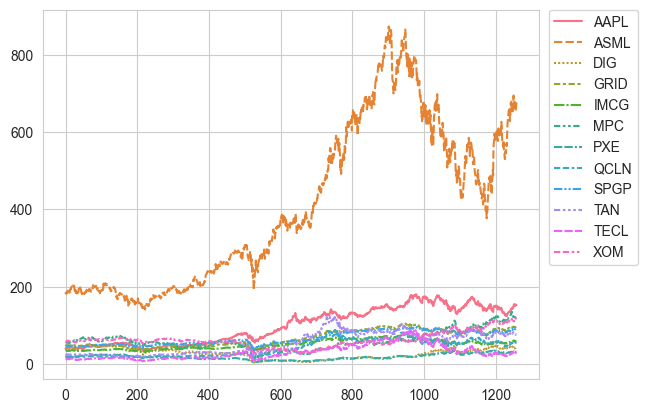

In [16]:
ax=sns.lineplot(data=etfdata.drop('^GSPC',axis=1))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [17]:
daily_return = etfdata.set_index('Date').pct_change(1)
daily_return

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC
Date,,,,,,,,,,,,,
2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-15,0.033579,0.018606,-0.005716,0.021639,0.012144,-0.005282,-0.001432,0.019260,0.014490,0.027117,0.055491,-0.003270,0.012069
2018-02-16,-0.003237,-0.013699,-0.002587,0.004903,0.000574,0.001917,-0.001434,-0.000994,0.003933,0.008936,-0.006236,0.004330,0.000373
2018-02-20,-0.003364,0.017115,-0.012104,-0.006831,-0.003201,-0.018082,-0.011968,0.005973,-0.005361,0.002818,0.006116,-0.010321,-0.005841
2018-02-21,-0.004539,-0.005677,-0.032380,0.002555,0.000048,0.000302,-0.016473,0.003464,-0.003317,0.005620,-0.021001,-0.011353,-0.005497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08,-0.017653,-0.023471,-0.018319,-0.003975,-0.009302,-0.005482,-0.011792,-0.013266,-0.015780,-0.011404,-0.036408,-0.008702,-0.011081
2023-02-09,-0.006912,0.002022,-0.016986,-0.003151,-0.011066,-0.006746,-0.013979,-0.017336,-0.008182,-0.020764,-0.015113,0.003775,-0.008830
2023-02-10,0.002456,-0.011715,0.078608,-0.002845,-0.002713,0.050108,0.054633,-0.011521,0.000557,-0.006806,-0.016944,0.042151,0.002195


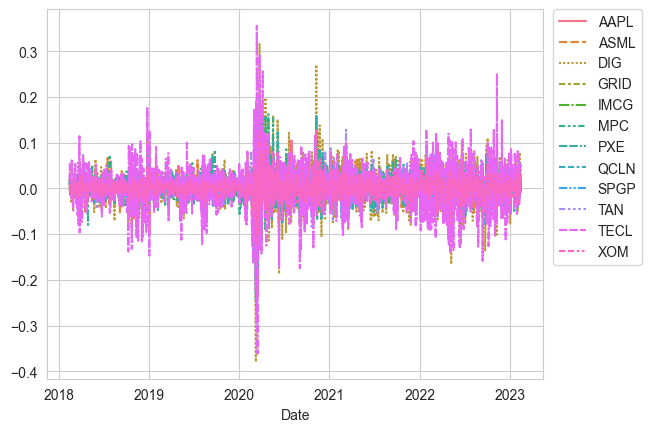

In [18]:
ax2=sns.lineplot(data=daily_return.drop('^GSPC',axis=1))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [19]:
# calculating expected returns
daily_return.describe()

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.001292,0.001385,0.001106,0.000701,0.000575,0.001111,0.000795,0.001159,0.000684,0.001286,0.002185,0.000769,0.000434
std,0.021078,0.025919,0.044556,0.016242,0.015451,0.030135,0.028294,0.024579,0.016140,0.026606,0.052079,0.021351,0.013719
min,-0.128647,-0.173492,-0.379538,-0.130073,-0.121495,-0.270089,-0.243848,-0.129821,-0.152728,-0.160839,-0.361638,-0.122248,-0.119841
25%,-0.009095,-0.012195,-0.020959,-0.007505,-0.007098,-0.013596,-0.014950,-0.011199,-0.006132,-0.012854,-0.023525,-0.010318,-0.005378
50%,0.001244,0.000871,0.001019,0.000942,0.001391,0.001167,0.001071,0.001793,0.001279,0.000584,0.002898,0.000446,0.000834
75%,0.012587,0.016232,0.024262,0.008761,0.009030,0.015469,0.016557,0.013731,0.008378,0.015470,0.029611,0.011285,0.007182
max,0.119808,0.145732,0.315476,0.109707,0.097899,0.206286,0.158554,0.146087,0.126338,0.135014,0.355145,0.126868,0.093828


<AxesSubplot: >

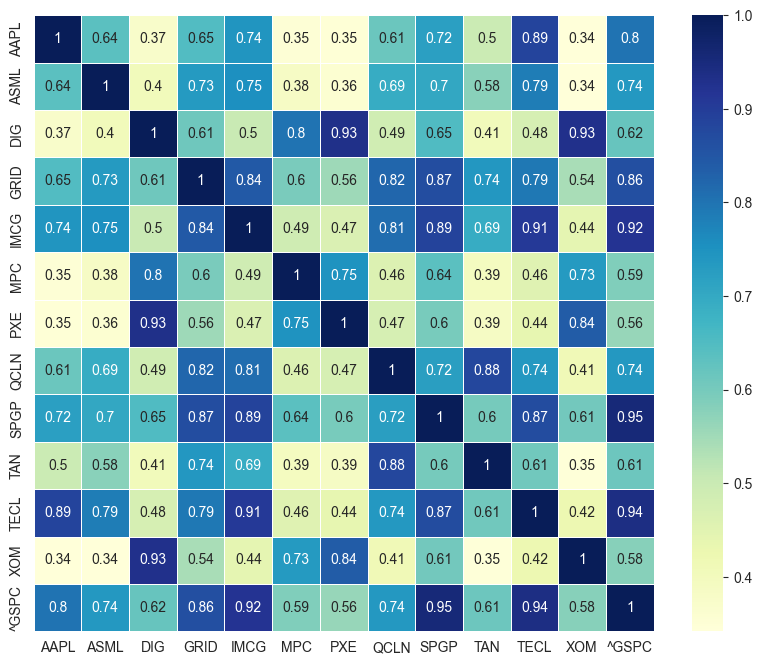

In [20]:
#using heat map for estimataing beta
plt.figure(figsize=(10,8))
sns.heatmap(daily_return.corr(method='pearson'),annot=True,linewidths=0.5,cmap='YlGnBu')

In [21]:
daily_return

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC
Date,,,,,,,,,,,,,
2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-15,0.033579,0.018606,-0.005716,0.021639,0.012144,-0.005282,-0.001432,0.019260,0.014490,0.027117,0.055491,-0.003270,0.012069
2018-02-16,-0.003237,-0.013699,-0.002587,0.004903,0.000574,0.001917,-0.001434,-0.000994,0.003933,0.008936,-0.006236,0.004330,0.000373
2018-02-20,-0.003364,0.017115,-0.012104,-0.006831,-0.003201,-0.018082,-0.011968,0.005973,-0.005361,0.002818,0.006116,-0.010321,-0.005841
2018-02-21,-0.004539,-0.005677,-0.032380,0.002555,0.000048,0.000302,-0.016473,0.003464,-0.003317,0.005620,-0.021001,-0.011353,-0.005497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08,-0.017653,-0.023471,-0.018319,-0.003975,-0.009302,-0.005482,-0.011792,-0.013266,-0.015780,-0.011404,-0.036408,-0.008702,-0.011081
2023-02-09,-0.006912,0.002022,-0.016986,-0.003151,-0.011066,-0.006746,-0.013979,-0.017336,-0.008182,-0.020764,-0.015113,0.003775,-0.008830
2023-02-10,0.002456,-0.011715,0.078608,-0.002845,-0.002713,0.050108,0.054633,-0.011521,0.000557,-0.006806,-0.016944,0.042151,0.002195


In [22]:
etfdata

,Date,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM,^GSPC
0,2018-02-14,39.889332,181.247574,38.983311,47.279766,33.744019,56.626171,18.621120,19.169464,45.328995,23.709242,11.767069,58.937313,2698.629883
1,2018-02-15,41.228760,184.619781,38.760479,48.302849,34.153809,56.327084,18.594456,19.538670,45.985798,24.352173,12.420033,58.744610,2731.199951
2,2018-02-16,41.095284,182.090591,38.660210,48.539677,34.173397,56.435089,18.567793,19.519239,46.166653,24.569777,12.342577,58.998974,2732.219971
3,2018-02-20,40.957058,185.207077,38.192276,48.208115,34.064011,55.414627,18.345581,19.635832,45.919167,24.639017,12.418070,58.390022,2716.260010
4,2018-02-21,40.771160,184.155609,36.955593,48.331268,34.065647,55.431347,18.043377,19.703846,45.766869,24.777493,12.157277,57.727112,2701.330078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2023-02-08,151.688400,662.789978,41.799999,95.209999,59.639999,121.559998,29.330000,56.529999,90.440002,78.019997,31.760000,113.050087,4117.859863
1255,2023-02-09,150.639999,664.130005,41.090000,94.910004,58.980000,120.739998,28.920000,55.549999,89.699997,76.400002,31.280001,113.476807,4081.500000
1256,2023-02-10,151.009995,656.349976,44.320000,94.639999,58.820000,126.790001,30.500000,54.910000,89.750000,75.879997,30.750000,118.260002,4090.459961
1257,2023-02-13,153.850006,668.739990,44.029999,96.059998,59.560001,127.809998,30.290001,55.450001,90.790001,77.080002,32.340000,117.800003,4137.290039


In [23]:
df=pd.melt(etfdata,id_vars='Date',value_vars=[
'XOM',
'MPC',
'IMCG',
'TAN',
'ASML',
'TECL',
'QCLN',
'AAPL',
'SPGP',
'DIG',
'GRID',
'PXE',
])
df.columns=['ds', 'ticker','y']

In [24]:
groups_by_ticker = df.groupby('ticker')
# Check the groups in the dataframe
groups_by_ticker.groups.keys()
ticker_list = [
'XOM',
'MPC',
'IMCG',
'TAN',
'ASML',
'TECL',
'QCLN',
'AAPL',
'SPGP',
'DIG',
'GRID',
'PXE',
]

In [25]:
def train_and_forecast(group):
  # Initiate the model
  m = Prophet()
  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods=30)
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['ticker'] = group['ticker'].iloc[0]
  # Return the forecasted results
  return forecast[['ds', 'ticker', 'yhat', 'yhat_upper', 'yhat_lower']]

In [26]:

# Create an empty dataframe
final = pd.DataFrame()
# Loop through each ticker
for ticker in ticker_list:
  # Get the data for the ticker
  group = groups_by_ticker.get_group(ticker)  
  # Make forecast
  forecast = train_and_forecast(group)
  # Add the forecast results to the dataframe
  final = pd.concat((final, forecast))
print('The time used for the for-loop forecast is ')
# Take a look at the data
final.head()

18:20:18 - cmdstanpy - INFO - Chain [1] start processing
18:20:19 - cmdstanpy - INFO - Chain [1] done processing
18:20:19 - cmdstanpy - INFO - Chain [1] start processing
18:20:19 - cmdstanpy - INFO - Chain [1] done processing
18:20:20 - cmdstanpy - INFO - Chain [1] start processing
18:20:20 - cmdstanpy - INFO - Chain [1] done processing
18:20:20 - cmdstanpy - INFO - Chain [1] start processing
18:20:21 - cmdstanpy - INFO - Chain [1] done processing
18:20:21 - cmdstanpy - INFO - Chain [1] start processing
18:20:22 - cmdstanpy - INFO - Chain [1] done processing
18:20:22 - cmdstanpy - INFO - Chain [1] start processing
18:20:22 - cmdstanpy - INFO - Chain [1] done processing
18:20:22 - cmdstanpy - INFO - Chain [1] start processing
18:20:23 - cmdstanpy - INFO - Chain [1] done processing
18:20:23 - cmdstanpy - INFO - Chain [1] start processing
18:20:23 - cmdstanpy - INFO - Chain [1] done processing
18:20:24 - cmdstanpy - INFO - Chain [1] start processing
18:20:24 - cmdstanpy - INFO - Chain [1]

The time used for the for-loop forecast is 


,ds,ticker,yhat,yhat_upper,yhat_lower
0,2018-02-14,XOM,56.600094,60.816276,52.738148
1,2018-02-15,XOM,56.868738,61.015192,53.041821
2,2018-02-16,XOM,57.201625,61.390818,53.105280
3,2018-02-20,XOM,58.313398,62.421059,54.320817
4,2018-02-21,XOM,58.431031,62.251642,54.575437


In [27]:
final.drop(['yhat_upper','yhat_lower'],axis = 1,inplace = True)
df_unmelted = final.pivot(index='ds', columns='ticker')

In [28]:
df_unmelted = df_unmelted['yhat'].reset_index()
df_unmelted.columns.name = None


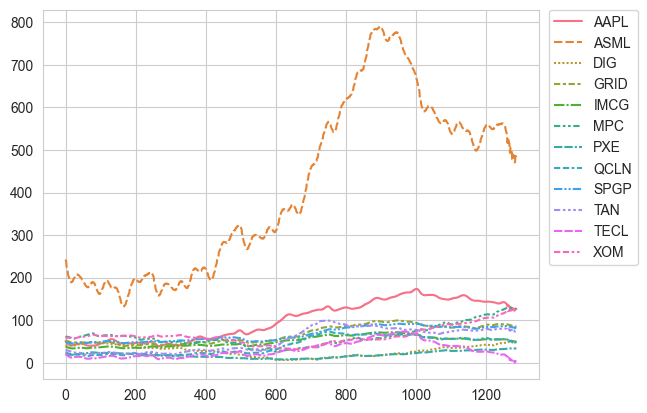

In [29]:
ax=sns.lineplot(data=df_unmelted)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [30]:
forecasted_returns = df_unmelted.set_index('ds')

In [31]:
forecasted_returns=forecasted_returns[forecasted_returns.index>datetime.now()]
forecasted_returns

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM
ds,,,,,,,,,,,,
2023-02-15,138.949250,542.996427,47.581045,90.284361,55.093326,128.218718,32.761863,54.433754,86.022156,79.753964,16.344982,119.534797
2023-02-16,138.156742,540.535732,47.748072,90.123332,54.958012,128.427829,32.843613,54.143967,85.958860,79.514115,15.687971,119.866137
2023-02-17,137.392577,536.878260,47.965128,89.956097,54.784017,128.700231,32.951221,53.842103,85.894437,79.239383,15.037806,120.259170
2023-02-18,133.515229,519.516380,47.264696,90.161089,54.498236,128.378762,33.021506,52.185061,86.370792,76.577254,11.324555,122.885319
2023-02-19,132.804420,516.286955,47.420485,90.009382,54.285482,128.542558,33.110473,51.920740,86.248796,76.413894,10.648474,123.208589
2023-02-20,135.591897,527.916002,48.451691,89.545710,54.121915,129.096573,33.225716,53.172854,85.501404,78.759886,13.157068,121.207496
2023-02-21,134.867044,524.177912,48.681075,89.418608,53.937156,129.391390,33.343319,52.951419,85.392884,78.787855,12.470210,121.586403
2023-02-22,134.073645,520.768529,48.640181,89.232577,53.629886,129.332407,33.369736,52.618258,85.178979,78.631686,11.702945,121.752203
2023-02-23,133.192996,517.782305,48.741951,88.957205,53.392479,129.339361,33.422528,52.240914,85.020906,78.346702,10.923081,121.984572


In [32]:
start_end=(forecasted_returns.iloc[-1]-forecasted_returns.iloc[0])/forecasted_returns.iloc[0]
start_end

AAPL   -0.089411
ASML   -0.102174
DIG     0.009778
GRID   -0.062335
IMCG   -0.105137
MPC    -0.012893
PXE     0.023581
QCLN   -0.104717
SPGP   -0.051190
TAN    -0.057439
TECL   -0.789923
XOM     0.021715
dtype: float64

In [33]:
#mean_forecasted_daily_return = forecasted_returns.mean()
#mean_forecasted_daily_return

In [34]:
cov=daily_return.cov()
var=daily_return['^GSPC'].var()
betalist={}
for i in daily_return.drop('^GSPC',axis=1).columns: 
    betalist[i]=(cov.loc[i,'^GSPC']/var).round(2)
betalist.items() 


dict_items([('AAPL', 1.23), ('ASML', 1.39), ('DIG', 2.01), ('GRID', 1.02), ('IMCG', 1.04), ('MPC', 1.29), ('PXE', 1.16), ('QCLN', 1.32), ('SPGP', 1.12), ('TAN', 1.19), ('TECL', 3.56), ('XOM', 0.9)])

In [35]:
expreturn={}
for i,j in start_end.items():
    expreturn[i] = j  

In [36]:
#forecasted_returns[end]

In [37]:
#expreturn=round(expreturn,4)

In [38]:
def portfolio_annualized_performance(weights, expreturn, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(expreturn*weights)
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [39]:
def generate_random_portfolios(num_portfolios, expreturn, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our ETFs
        weights = np.random.random(12)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, expreturn, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

In [40]:
returns = etfdata.drop('^GSPC',axis=1).set_index('Date').pct_change()
expreturn = pd.Series(expreturn)
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.0368

/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_92217/2614188109.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.Allocation]


Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: -0.03
Annualized Volatility: 0.02
Allocation at max Sharpe ratio
                AAPL      ASML       DIG      GRID      IMCG       MPC  \
Allocation  0.040523  0.098733  0.153583  0.000191  0.014838  0.165751   

                 PXE      QCLN     SPGP       TAN      TECL       XOM  
Allocation  0.147734  0.059213  0.09582  0.085099  0.003174  0.135341   



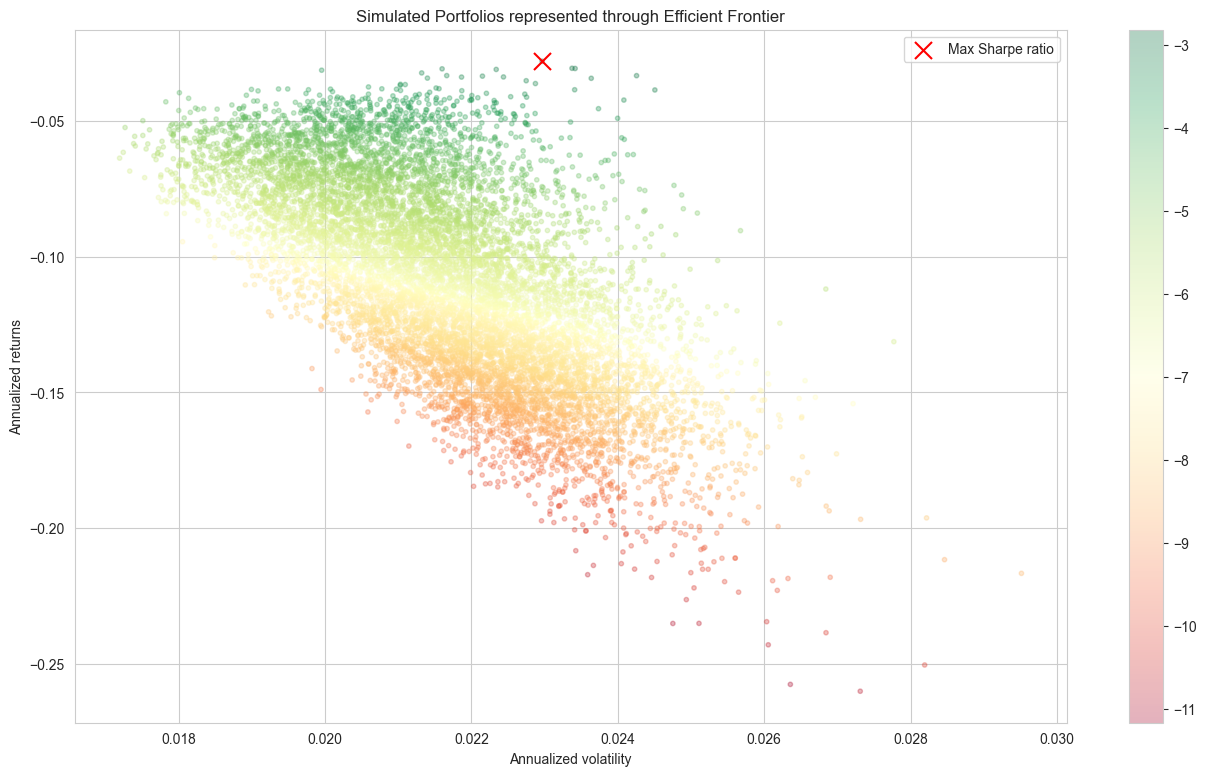

In [41]:
def display_simulated_portfolios(expreturn, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios,expreturn, cov_matrix, risk_free_rate)

    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=etfdata.drop('^GSPC',axis=1).set_index('Date').columns,columns=['Allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.Allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    print("Portfolio at maximum Sharpe Ratio\n")
    print("="*100)
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    print("="*100)
    print("Allocation at max Sharpe ratio")
    print(max_sharpe_allocation,"\n")
    print("="*100)

    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='RdYlGn', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated Portfolios represented through Efficient Frontier')
    plt.xlabel('Projected volatility')
    plt.ylabel('Projected Returns')
    plt.legend(labelspacing=1.2)
    return(max_sharpe_allocation)
results=display_simulated_portfolios(expreturn, cov_matrix, num_portfolios, risk_free_rate)


In [42]:
#Estimating VAR for the portfolio @ optimal Allocations shown below
results

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM
Allocation,0.040523,0.098733,0.153583,0.000191,0.014838,0.165751,0.147734,0.059213,0.09582,0.085099,0.003174,0.135341


In [43]:
forecasted_returns.index

DatetimeIndex(['2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
               '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
               '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16'],
              dtype='datetime64[ns]', name='ds', freq=None)

In [44]:
#creating a new dataframe to store returns of individual stock after current date
portfolio_assetr=df_unmelted[df_unmelted.ds>datetime.now()]
portfolio_assetr

,ds,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM
1259,2023-02-15,138.949250,542.996427,47.581045,90.284361,55.093326,128.218718,32.761863,54.433754,86.022156,79.753964,16.344982,119.534797
1260,2023-02-16,138.156742,540.535732,47.748072,90.123332,54.958012,128.427829,32.843613,54.143967,85.958860,79.514115,15.687971,119.866137
1261,2023-02-17,137.392577,536.878260,47.965128,89.956097,54.784017,128.700231,32.951221,53.842103,85.894437,79.239383,15.037806,120.259170
1262,2023-02-18,133.515229,519.516380,47.264696,90.161089,54.498236,128.378762,33.021506,52.185061,86.370792,76.577254,11.324555,122.885319
1263,2023-02-19,132.804420,516.286955,47.420485,90.009382,54.285482,128.542558,33.110473,51.920740,86.248796,76.413894,10.648474,123.208589
1264,2023-02-20,135.591897,527.916002,48.451691,89.545710,54.121915,129.096573,33.225716,53.172854,85.501404,78.759886,13.157068,121.207496
1265,2023-02-21,134.867044,524.177912,48.681075,89.418608,53.937156,129.391390,33.343319,52.951419,85.392884,78.787855,12.470210,121.586403
1266,2023-02-22,134.073645,520.768529,48.640181,89.232577,53.629886,129.332407,33.369736,52.618258,85.178979,78.631686,11.702945,121.752203
1267,2023-02-23,133.192996,517.782305,48.741951,88.957205,53.392479,129.339361,33.422528,52.240914,85.020906,78.346702,10.923081,121.984572
1268,2023-02-24,132.390040,513.795562,48.879752,88.682450,53.130272,129.397252,33.494607,51.869977,84.868351,78.037105,10.195615,122.257906


In [45]:
portfolio_assetr=portfolio_assetr.set_index('ds').pct_change()

In [46]:
portfolio_assetr

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM
ds,,,,,,,,,,,,
2023-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-16,-0.005704,-0.004532,0.003510,-0.001784,-0.002456,0.001631,0.002495,-0.005324,-0.000736,-0.003007,-0.040197,0.002772
2023-02-17,-0.005531,-0.006766,0.004546,-0.001856,-0.003166,0.002121,0.003276,-0.005575,-0.000749,-0.003455,-0.041443,0.003279
2023-02-18,-0.028221,-0.032339,-0.014603,0.002279,-0.005217,-0.002498,0.002133,-0.030776,0.005546,-0.033596,-0.246928,0.021837
2023-02-19,-0.005324,-0.006216,0.003296,-0.001683,-0.003904,0.001276,0.002694,-0.005065,-0.001412,-0.002133,-0.059700,0.002631
2023-02-20,0.020989,0.022524,0.021746,-0.005151,-0.003013,0.004310,0.003481,0.024116,-0.008666,0.030701,0.235583,-0.016242
2023-02-21,-0.005346,-0.007081,0.004734,-0.001419,-0.003414,0.002284,0.003539,-0.004164,-0.001269,0.000355,-0.052204,0.003126
2023-02-22,-0.005883,-0.006504,-0.000840,-0.002080,-0.005697,-0.000456,0.000792,-0.006292,-0.002505,-0.001982,-0.061528,0.001364
2023-02-23,-0.006568,-0.005734,0.002092,-0.003086,-0.004427,0.000054,0.001582,-0.007171,-0.001856,-0.003624,-0.066638,0.001909


In [47]:
portfolio_assetr.dropna(inplace=True)

In [48]:
results=results.T


In [49]:
allocation=results.to_dict()
#allocation

In [50]:
portfolio_assetr.mul(allocation['Allocation'])

,AAPL,ASML,DIG,GRID,IMCG,MPC,PXE,QCLN,SPGP,TAN,TECL,XOM
ds,,,,,,,,,,,,
2023-02-16,-2.311278e-04,-0.000447,0.000539,-3.413956e-07,-0.000036,0.000270,0.000369,-0.000315,-0.000071,-0.000256,-0.000128,0.000375
2023-02-17,-2.241403e-04,-0.000668,0.000698,-3.551878e-07,-0.000047,0.000352,0.000484,-0.000330,-0.000072,-0.000294,-0.000132,0.000444
2023-02-18,-1.143606e-03,-0.003193,-0.002243,4.361894e-07,-0.000077,-0.000414,0.000315,-0.001822,0.000531,-0.002859,-0.000784,0.002956
2023-02-19,-2.157380e-04,-0.000614,0.000506,-3.220735e-07,-0.000058,0.000211,0.000398,-0.000300,-0.000135,-0.000182,-0.000189,0.000356
2023-02-20,8.505575e-04,0.002224,0.003340,-9.860295e-07,-0.000045,0.000714,0.000514,0.001428,-0.000830,0.002613,0.000748,-0.002198
2023-02-21,-2.166312e-04,-0.000699,0.000727,-2.716899e-07,-0.000051,0.000379,0.000523,-0.000247,-0.000122,0.000030,-0.000166,0.000423
2023-02-22,-2.383915e-04,-0.000642,-0.000129,-3.982232e-07,-0.000085,-0.000076,0.000117,-0.000373,-0.000240,-0.000169,-0.000195,0.000185
2023-02-23,-2.661732e-04,-0.000566,0.000321,-5.906939e-07,-0.000066,0.000009,0.000234,-0.000425,-0.000178,-0.000308,-0.000211,0.000258
2023-02-24,-2.442956e-04,-0.000760,0.000434,-5.911958e-07,-0.000073,0.000074,0.000319,-0.000420,-0.000172,-0.000336,-0.000211,0.000303


In [51]:
#expectedreturnport.dtype

In [52]:
expectedreturnport=pd.DataFrame()
expectedreturnport['PortfolioDailyReturns']=portfolio_assetr.sum(axis=1)


Text(0.5, 1.0, '1 Month Forecasted Returns PDF')

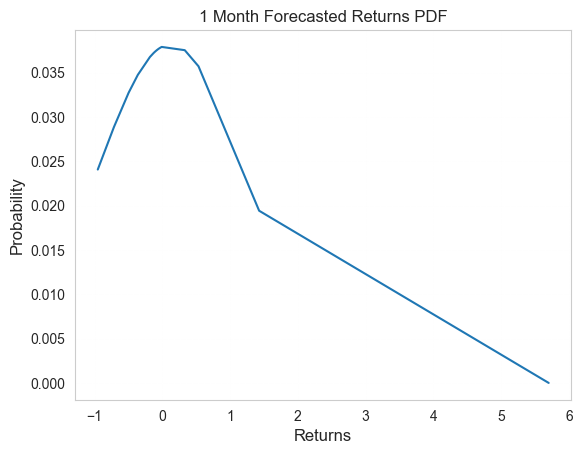

In [69]:
import scipy.stats as stats


# Calculating mean and Stdev of AGW
df_mean = np.mean(expectedreturnport['PortfolioDailyReturns'])
df_std = np.std(expectedreturnport['PortfolioDailyReturns'])
 
# Calculating probability density function (PDF)
freq = stats.norm.pdf(expectedreturnport['PortfolioDailyReturns'].sort_values(), df_mean, df_std)
pdf=freq/freq.sum()
# Drawing a graph
plt.plot(expectedreturnport['PortfolioDailyReturns'].sort_values(), pdf) 
plt.xlabel("Returns", size=12)    
plt.ylabel("Probability", size=12)                
plt.grid(True, alpha=0.02, linestyle="--")
plt.title('1 Month Forecasted Returns PDF')



/var/folders/v4/pcb5pkfn5h7b0vj_np_0db040000gn/T/ipykernel_92217/2402909457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(expectedreturnport['PortfolioDailyReturns'])


<AxesSubplot: xlabel='PortfolioDailyReturns', ylabel='Density'>

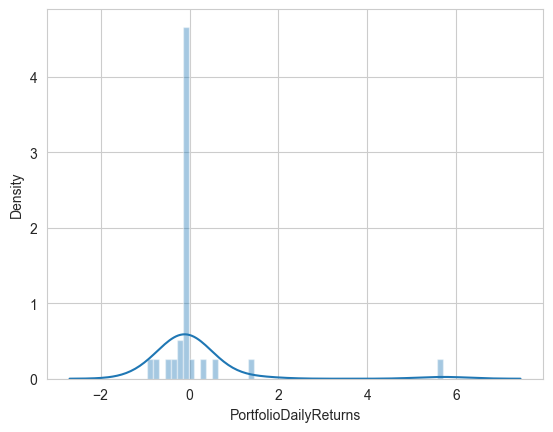

In [54]:
sns.distplot(expectedreturnport['PortfolioDailyReturns'])